# 04_evaluation.ipynb - Model Evaluation and Residual Analysis
Analyze prediction errors and residuals for model performance understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load predictions
pred_df = pd.read_csv('../reports/model_predictions.csv', parse_dates=['DATE_TIME'], index_col='DATE_TIME')
pred_df.head()

,True,LR_Pred,RF_Pred
DATE_TIME,,,
2020-06-13 15:30:00,655.250000,655.250000,655.194768
2020-06-13 15:30:00,773.162500,773.162500,773.117679
2020-06-13 15:30:00,718.314286,718.314286,718.422786
2020-06-13 15:30:00,785.912500,785.912500,786.073268
2020-06-13 15:30:00,856.785714,856.785714,857.234364


In [3]:
# Calculate residuals
pred_df['Residual_LR'] = pred_df['True'] - pred_df['LR_Pred']
pred_df['Residual_RF'] = pred_df['True'] - pred_df['RF_Pred']

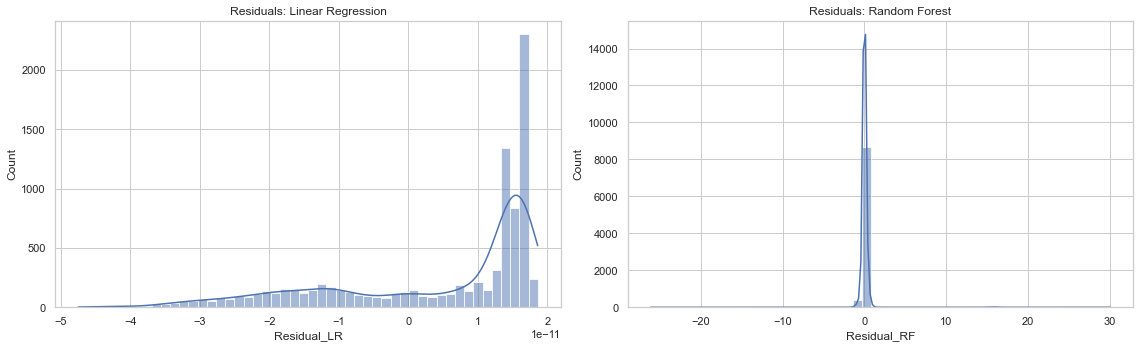

In [4]:
# Histogram of residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(pred_df['Residual_LR'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Residuals: Linear Regression")
sns.histplot(pred_df['Residual_RF'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Residuals: Random Forest")
plt.tight_layout()
plt.show()

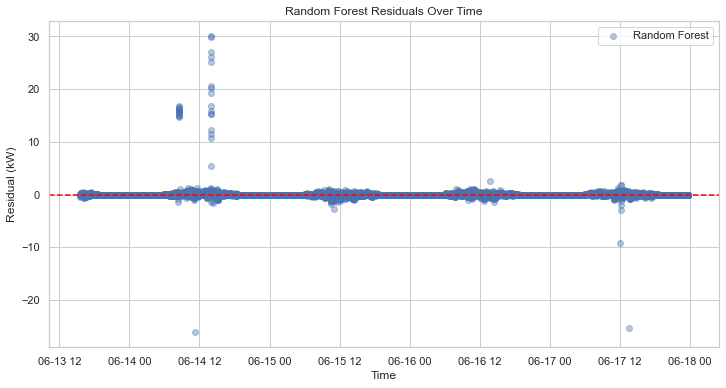

In [5]:
# Residual scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(pred_df.index, pred_df['Residual_RF'], alpha=0.4, label='Random Forest')
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest Residuals Over Time")
plt.ylabel("Residual (kW)")
plt.xlabel("Time")
plt.legend()
plt.show()

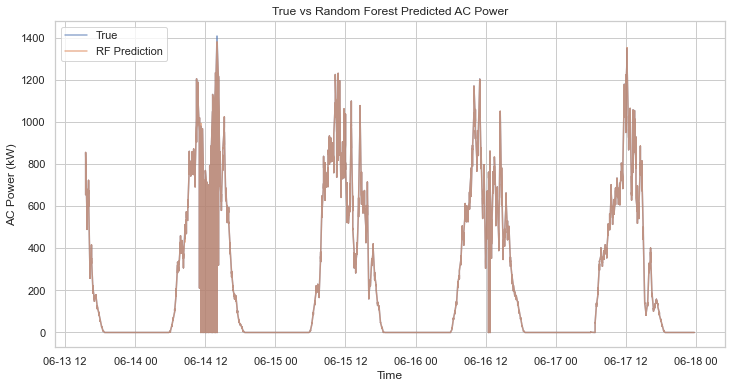

In [6]:
# True vs Predicted plot
plt.figure(figsize=(12, 6))
plt.plot(pred_df.index, pred_df['True'], label='True', alpha=0.6)
plt.plot(pred_df.index, pred_df['RF_Pred'], label='RF Prediction', alpha=0.6)
plt.legend()
plt.title("True vs Random Forest Predicted AC Power")
plt.ylabel("AC Power (kW)")
plt.xlabel("Time")
plt.show()

In [7]:
# Save residuals for future analysis
pred_df.to_csv('../reports/model_residuals.csv')
print("✅ Residuals saved to model_residuals.csv")

✅ Residuals saved to model_residuals.csv
